In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/suleymanbarisbasaran/Downloads/bias_data.csv")

In [3]:
df

,title_full,title,title_slug,url,category,bias_rating,factual_reporting,country,press_freedom_rating,media_type,...,mbfc’s_freedom_rating,press_freedom_rank,world_press_freedom_rank,mbfc’s_country_freedom_rank,mbfc’s_country_freedom_profile,press_freedom_rating_,mbfc_country_freedom_rating,reasoning,_world_press_freedom_rank,questionable_reasoning
0,9News – KUSA (9news.com),9News – KUSA,9news-kusa,https://mediabiasfactcheck.com/9news-kusa/,center,LEAST BIASED,HIGH,USA,MOSTLY FREE,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 News – KKCO (nbc11news.com),11 News – KKCO,11-news-kkco,https://mediabiasfactcheck.com/11-news-kkco/,center,LEAST BIASED,HIGH,USA,MOSTLY FREE,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12 News KPNX (12news.com),12 News KPNX,12-news-kpnx,https://mediabiasfactcheck.com/12-news-kpnx/,center,LEAST BIASED,HIGH,USA,MOSTLY FREE,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13 News – WIBW (wibw.com),13 News – WIBW,13-news-wibw,https://mediabiasfactcheck.com/13-news-wibw/,center,LEAST BIASED,HIGH,USA,MOSTLY FREE,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23WIFR News (wifr.com),23WIFR News,23wifr-news,https://mediabiasfactcheck.com/23wifr-news/,center,LEAST BIASED,HIGH,USA,MOSTLY FREE,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,Western Standard (westernstandard.news),Western Standard,western-standard-bias,https://mediabiasfactcheck.com/western-standar...,right,RIGHT,MIXED,Canada,NaN,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3551,WikiIslam (wikiislam.net)\n,WikiIslam,wikiislam,https://mediabiasfactcheck.com/wikiislam/,right,RIGHT,MIXED,USA,NaN,Website,...,NaN,MOSTLY FREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3552,World Magazine (world.wng.org),World Magazine,world-magazine,https://mediabiasfactcheck.com/world-magazine/,right,RIGHT,MIXED,USA,NaN,Magazine,...,NaN,MOSTLY FREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3553,Yellow Hammer News (yellowhammernews.com),Yellow Hammer News,yellowhammer-news,https://mediabiasfactcheck.com/yellowhammer-news/,right,RIGHT,HIGH,USA,MOSTLY FREE,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Categories

In [4]:
## Distribution of Media Organizations by Categories

category_counts = df['category'].value_counts()
print(category_counts)


center          1294
leftcenter      1058
right-center     594
left             365
right            244
Name: category, dtype: int64


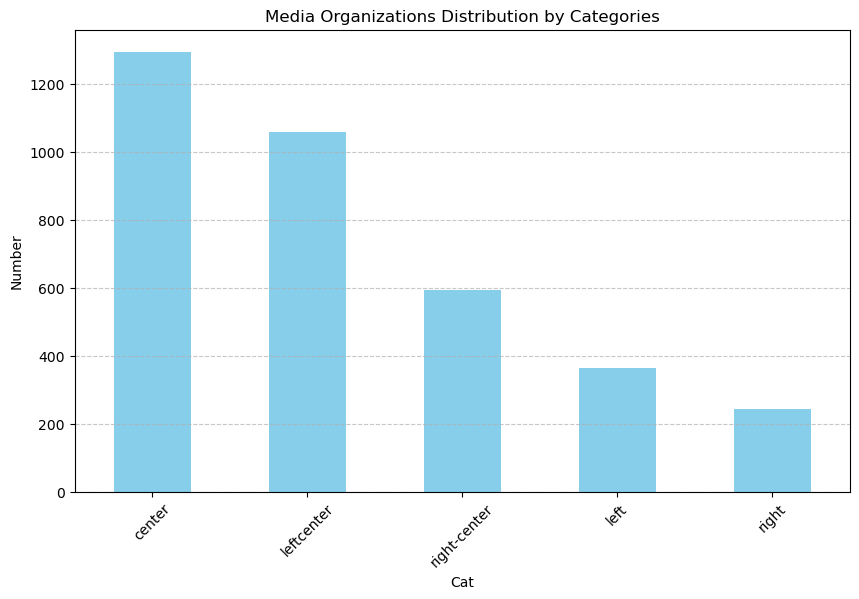

In [5]:
# visualization
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Media Organizations Distribution by Categories')
plt.xlabel('Cat')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Most popular category
most_popular_category = category_counts.idxmax()
print("Most popular category:", most_popular_category)

# The category with the highest reliability rating
high_credibility_category = df[df['mbfc_credibility_rating'] == 'HIGH CREDIBILITY']['category'].value_counts().idxmax()
print("The category with the highest reliability rating:", high_credibility_category)


Most popular category: center
The category with the highest reliability rating: center


In [7]:
# top 3 categories with the highest reliability rating
top3_high_credibility_categories = df[df['mbfc_credibility_rating'] == 'HIGH CREDIBILITY']['category'].value_counts().nlargest(3)

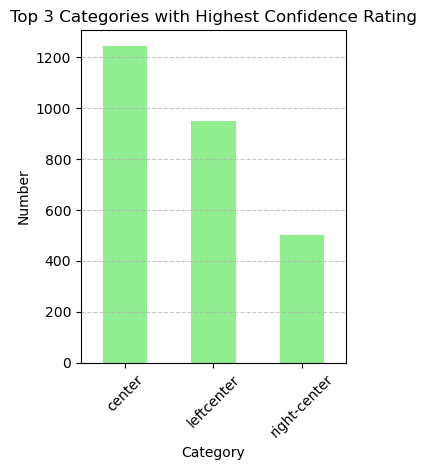

In [8]:
# Top 3 category images with the highest reliability rating
plt.subplot(1, 2, 2)
top3_high_credibility_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 3 Categories with Highest Confidence Rating')
plt.xlabel('Category')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Neutrality

In [9]:
# calculate the distribution according to the degrees of neutrality
bias_counts = df['bias_rating'].value_counts()

print(bias_counts)

LEAST BIASED                        1254
LEFT-CENTER                         1033
RIGHT-CENTER                         583
LEFT                                 321
RIGHT                                216
FAR LEFT                              10
LEFT CENTER                            3
FAR RIGHT                              3
PRO-SCIENCE                            2
LEFT BIASED                            1
FAR-LEFT                               1
LEFT-CENTER (by Saudi standards)       1
RIGHT CENTER                           1
FAR-RIGHT                              1
Name: bias_rating, dtype: int64


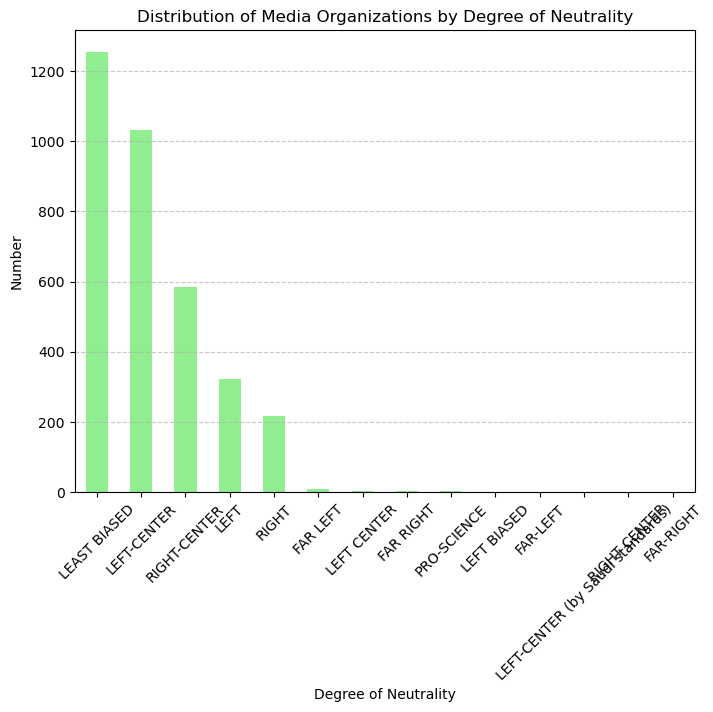

In [10]:
# visualization
plt.figure(figsize=(8, 6))
bias_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Media Organizations by Degree of Neutrality')
plt.xlabel('Degree of Neutrality')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# calculate the number of factual reporting according to the degree of neutrality
factual_reporting_counts = df.groupby('bias_rating')['factual_reporting'].value_counts().unstack().fillna(0)

print(factual_reporting_counts)

factual_reporting                   HIGH  LOW  MIXED  MOSTLY FACTUAL  \
bias_rating                                                            
FAR LEFT                             0.0  0.0    5.0             5.0   
FAR RIGHT                            0.0  1.0    2.0             0.0   
FAR-LEFT                             0.0  0.0    0.0             1.0   
FAR-RIGHT                            0.0  0.0    1.0             0.0   
LEAST BIASED                      1169.0  0.0   18.0            31.0   
LEFT                               154.0  0.0   84.0            83.0   
LEFT BIASED                          1.0  0.0    0.0             0.0   
LEFT CENTER                          2.0  0.0    0.0             1.0   
LEFT-CENTER                        890.0  0.0   55.0            83.0   
LEFT-CENTER (by Saudi standards)     0.0  0.0    1.0             0.0   
PRO-SCIENCE                          1.0  0.0    0.0             1.0   
RIGHT                               13.0  0.0  166.0            

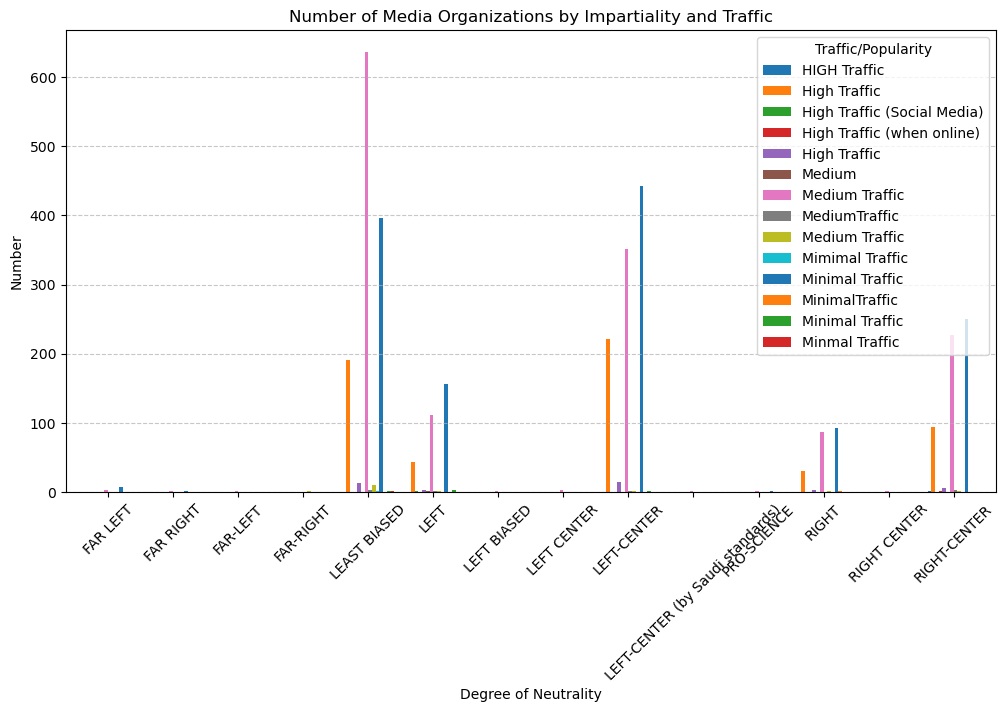

In [12]:
# group media organizations according to the degree of neutrality and traffic
grouped_data = df.groupby(['bias_rating', 'traffic/popularity']).size().unstack().fillna(0)

# Vis
grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Number of Media Organizations by Impartiality and Traffic')
plt.xlabel('Degree of Neutrality')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.legend(title='Traffic/Popularity', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

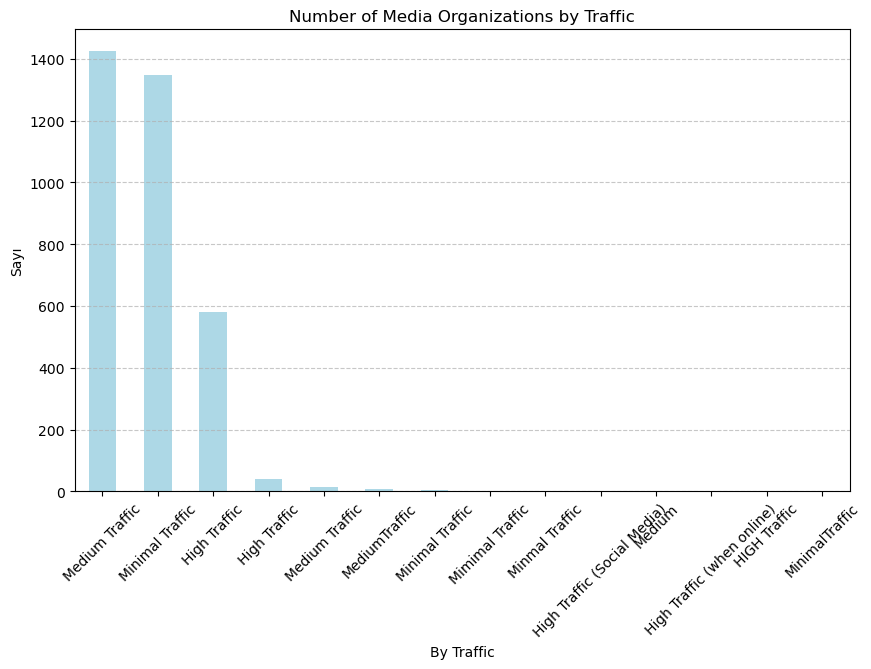

In [13]:
# calculate the number of media outlets by traffic
traffic_counts = df['traffic/popularity'].value_counts()

# Görselleştirme
plt.figure(figsize=(10, 6))
traffic_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Media Organizations by Traffic')
plt.xlabel('By Traffic')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Reliablity

In [14]:
# Distribution of Media Organizations by Reliability Degrees:

credibility_counts = df['mbfc_credibility_rating'].value_counts()

print(credibility_counts)


HIGH CREDIBILITY      2926
MEDIUM CREDIBILITY     467
MEDIUM CREDIBILITY      17
LOW CREDIBILITY         12
HIGH CREDIBILITY         6
LOW CREDIBILITY          1
MIXED CREDIBILITY        1
Name: mbfc_credibility_rating, dtype: int64


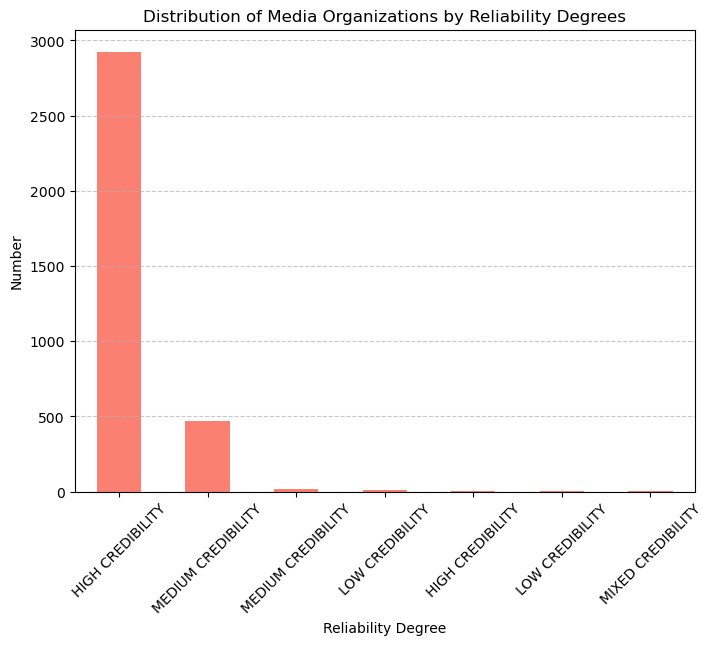

In [15]:
# visualization
plt.figure(figsize=(8, 6))
credibility_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Media Organizations by Reliability Degrees')
plt.xlabel('Reliability Degree')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Media Organizations by Country

In [26]:
## Distribution of Media Organizations by Country:
country_counts = df['country'].value_counts().nlargest(10)

print(country_counts)

USA               1804
United Kingdom      78
Canada              15
Australia           14
France              12
Israel               9
Germany              8
Italy                7
Netherlands          7
Belgium              7
Name: country, dtype: int64


In [28]:
df['country'].value_counts()

USA                     1804
United Kingdom            78
Canada                    15
Australia                 14
France                    12
Israel                     9
Germany                    8
Italy                      7
Netherlands                7
Belgium                    7
South Africa               7
Ukraine                    6
Indonesia                  5
Sweden                     5
Argentina                  4
Spain                      4
Finland                    4
Ireland                    3
South Korea                3
Nigeria                    3
Taiwan                     2
Austria                    2
Iceland                    2
United Arab Emirates       2
Malaysia                   2
Denmark                    2
United States              2
Pakistan                   2
Russia                     2
Cyprus                     2
Czech Republic             1
Thailand                   1
Hong Kong                  1
Portugal                   1
Norway        

In [37]:
df[df['country'] == "USA"]#["bias_rating"].value_counts()

,title_full,title,title_slug,url,category,bias_rating,factual_reporting,country,press_freedom_rating,media_type,...,mbfc’s_freedom_rating,press_freedom_rank,world_press_freedom_rank,mbfc’s_country_freedom_rank,mbfc’s_country_freedom_profile,press_freedom_rating_,mbfc_country_freedom_rating,reasoning,_world_press_freedom_rank,questionable_reasoning
0,9News – KUSA (9news.com),9News – KUSA,9news-kusa,https://mediabiasfactcheck.com/9news-kusa/,center,LEAST BIASED,HIGH,USA,1.0,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 News – KKCO (nbc11news.com),11 News – KKCO,11-news-kkco,https://mediabiasfactcheck.com/11-news-kkco/,center,LEAST BIASED,HIGH,USA,1.0,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12 News KPNX (12news.com),12 News KPNX,12-news-kpnx,https://mediabiasfactcheck.com/12-news-kpnx/,center,LEAST BIASED,HIGH,USA,1.0,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13 News – WIBW (wibw.com),13 News – WIBW,13-news-wibw,https://mediabiasfactcheck.com/13-news-wibw/,center,LEAST BIASED,HIGH,USA,1.0,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23WIFR News (wifr.com),23WIFR News,23wifr-news,https://mediabiasfactcheck.com/23wifr-news/,center,LEAST BIASED,HIGH,USA,1.0,TV Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,Twitchy (twitchy.com),Twitchy,twitchy,https://mediabiasfactcheck.com/twitchy/,right,RIGHT,MIXED,USA,1.0,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3547,Washington Free Beacon (freebeacon.com),Washington Free Beacon,washington-free-beacon,https://mediabiasfactcheck.com/washington-free...,right,RIGHT,MIXED,USA,1.0,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3548,Watchdog Report (watchdogreport.org),Watchdog Report,watchdog-report,https://mediabiasfactcheck.com/watchdog-report/,right,RIGHT,MIXED,USA,1.0,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3549,Weasel Zippers (www.weaselzippers.us),Weasel Zippers,weasel-zippers,https://mediabiasfactcheck.com/weasel-zippers/,right,RIGHT,MIXED,USA,1.0,Website,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


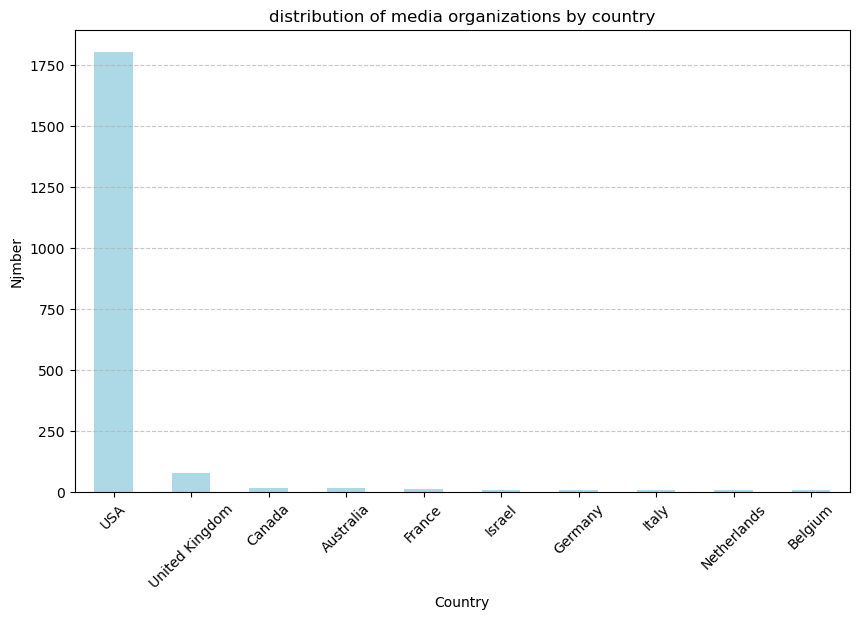

In [27]:
# visualization
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', czolor='lightblue')
plt.title('distribution of media organizations by country')
plt.xlabel('Country')
plt.ylabel('Njmber')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Popularity of Media Organizations

In [18]:
#Distribution by Popularity of Media Organizations:

popularity_counts = df['traffic/popularity'].value_counts()

print(popularity_counts)

Medium Traffic                 1424
Minimal Traffic                1348
High Traffic                    581
High Traffic                     40
Medium Traffic                   15
MediumTraffic                     8
Minimal Traffic                   6
Mimimal Traffic                   2
Minmal Traffic                    1
High Traffic (Social Media)       1
Medium                            1
High Traffic (when online)        1
HIGH Traffic                      1
MinimalTraffic                    1
Name: traffic/popularity, dtype: int64


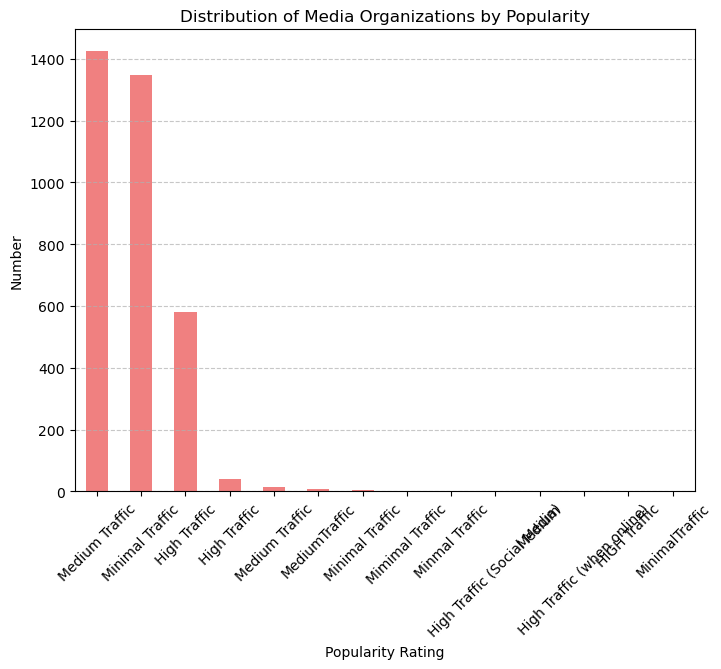

In [19]:
# visualization
plt.figure(figsize=(8, 6))
popularity_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Media Organizations by Popularity')
plt.xlabel('Popularity Rating')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Press Freedom:

In [20]:
## Distribution by Degrees of Press Freedom:
press_freedom_counts = df['press_freedom_rating'].value_counts()

print(press_freedom_counts)


MOSTLY FREE         1979
EXCELLENT             23
MODERATE FREEDOM      20
LIMITED FREEDOM       19
TOTAL OPPRESSION       3
Name: press_freedom_rating, dtype: int64


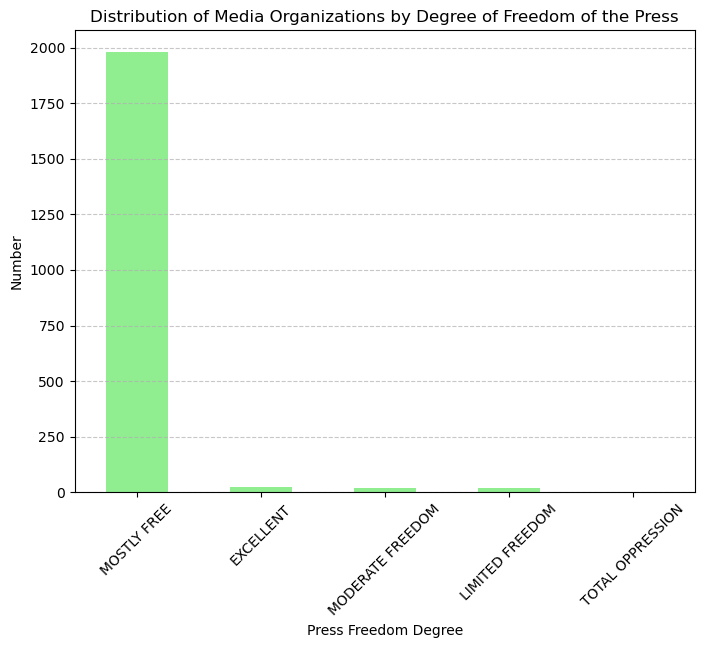

In [21]:
# visualization
plt.figure(figsize=(8, 6))
press_freedom_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Media Organizations by Degree of Freedom of the Press')
plt.xlabel('Press Freedom Degree')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparison of Countries by Press Freedom and Reliability Degree

In [22]:
# clear the null values (NaN)
df.dropna(subset=['press_freedom_rating', 'mbfc_credibility_rating'], inplace=True)

In [23]:
# convert the degree of freedom of the press into numerical value
df['press_freedom_rating'] = df['press_freedom_rating'].map({
    "MOSTLY FREE": 1,
    "FREE": 2,
    "PARTLY FREE": 3
})

# convert the degree of confidence to a numeric value
df['mbfc_credibility_rating'] = df['mbfc_credibility_rating'].map({
    "HIGH CREDIBILITY": 1,
    "MIXED CREDIBILITY": 2,
    "LOW CREDIBILITY": 3
})

In [24]:
# compare countries' degrees of press freedom and reliability
country_comparison = df.groupby('country').agg({
    'press_freedom_rating': 'mean',
    'mbfc_credibility_rating': 'mean'
}).reset_index()

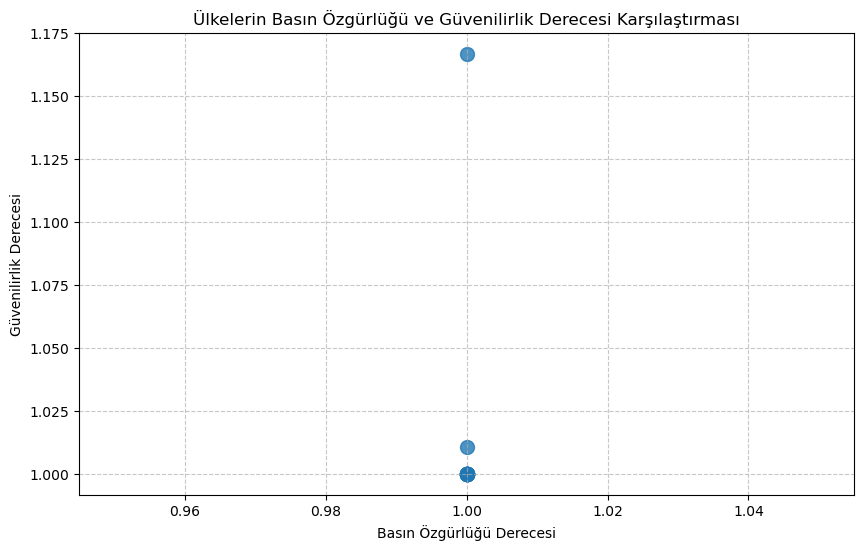

In [25]:
# Visualization - Comparison of press freedom and credibility of countries
plt.figure(figsize=(10, 6))
plt.scatter(country_comparison['press_freedom_rating'], country_comparison['mbfc_credibility_rating'], s=100, alpha=0.8)
plt.xlabel('Press Freedom Degree')
plt.ylabel('Reliability Degree')
plt.title('Press Freedom and Confidence Degree Comparison of Countries')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

